In [77]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



  $$ \begin{align*} E &= - \frac{J}{2}\sum_{<i,j>} \sigma_i\sigma_j \\
   dE &= 2\cdot\sigma_i\sum_{<i,j>}\sigma_j
   \end{align*}
  
  
  
  $$

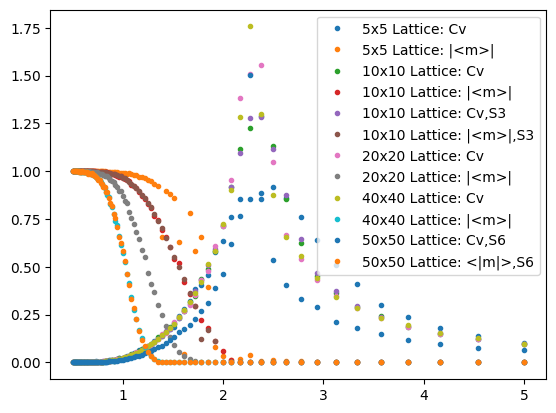

In [78]:
data = np.loadtxt("../build/simulation1.txt") # 5x5 Lattice, 10000 Sweep, ignore first 5000
N = 5**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="5x5 Lattice: Cv")
plt.plot(x,abs(y2),'.',label="5x5 Lattice: |<m>|")

data = np.loadtxt("../build/simulation2.txt") # 10x10 Lattice, 10000 Sweep, ignore first 5000
N = 10**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="10x10 Lattice: Cv")
plt.plot(x,abs(y2),'.',label="10x10 Lattice: |<m>|")
plt.legend()
data = np.loadtxt("../build/simulation3.txt") # 10x10 Lattice, 50000 Sweep, ignore first 20000
N = 10**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="10x10 Lattice: Cv,S3")
plt.plot(x,abs(y2),'.',label="10x10 Lattice: |<m>|,S3")
plt.legend()

data = np.loadtxt("../build/simulation4.txt") # 20x20 Lattice, 10000 Sweep, ignore first 5000
N = 20**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="20x20 Lattice: Cv")
plt.plot(x,abs(y2),'.',label="20x20 Lattice: |<m>|")
plt.legend()

data = np.loadtxt("../build/simulation5.txt") # 40x40 Lattice, 200000 Sweep, ignore first 10000
N = 40**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="40x40 Lattice: Cv")
plt.plot(x,abs(y2),'.',label="40x40 Lattice: |<m>|")

data = np.loadtxt("../build/simulation6.txt") # 50x50 Lattice, 200000 Sweep, ignore first 10000
N = 50**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="50x50 Lattice: Cv,S6")
plt.plot(x,abs(y2),'.',label="50x50 Lattice: <|m|>,S6")
plt.legend()
plt.show()

In [79]:
N = 40
Spin_2D = np.random.randint(-1,2,(N,N),dtype=int)
Spin_2D[Spin_2D==0] = 1
def del_E(Spin_2D,i,j):
    dE = Spin_2D[i][j]*(Spin_2D[i][(j-1+N)%N]+Spin_2D[(i+1+N)%N][j]+Spin_2D[i][(j+1)%N]+Spin_2D[(i-1+N)%N][j])
    return 2*dE
def Ising_sweep(B):
    for i in range(N):
        for j in range(N):
            de = del_E(Spin_2D,i,j)
            if(de<=0 or np.random.rand()<np.exp(-B*de)):
                Spin_2D[i][j] *= -1 




In [80]:
sweeplength = 5000
B = np.linspace(0.2,2,20)
spin = []
for i in B:
    avg_spin = []
    for k in range(sweeplength):
        Ising_sweep(i)
        if(k > 1000):
            avg_spin.append(np.abs(np.mean(Spin_2D)))
    spin.append(np.mean(avg_spin))



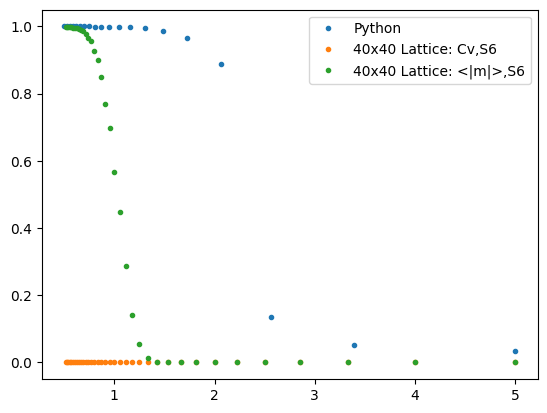

In [81]:
plt.plot(1/B,spin,'.',label='Python')
data = np.loadtxt("../build/simulation7.txt") # 40x40 Lattice, 200000 Sweep, ignore first 10000
N = 40**2
x = data[:,0]
y = data[:,1]
y2= data[:,2]
plt.plot(x,y/N,'.',label="40x40 Lattice: Cv,S6")
plt.plot(x,abs(y2),'.',label="40x40 Lattice: <|m|>,S6")
plt.legend()